### Student Information
Name: 邱一恩

Student ID: 113033628

GitHub ID: En90

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here
import pandas as pd
X = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [2]:
X

sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]

In [3]:
X['sentiment'].unique()

array(['not nostalgia', 'nostalgia'], dtype=object)

In [4]:
len(X)

1500

In [5]:
X.loc[1499, 'comment']

'This is the first CD I bought after my marriage ended in divorce after 28 years. I remember driving in my car turning this song up very loud had car the windows rolled down crying. 21 years later I still love this song'

In [6]:
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

X.isnull().apply(lambda row: check_missing_values(row))

sentiment                             comment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [7]:
sum(X.duplicated(subset=['comment']))

1

In [8]:
duplicates = X[X.duplicated(keep=False)]
print(duplicates)

        sentiment                                            comment
62  not nostalgia  never heard this song before... WOW What an am...
78  not nostalgia  never heard this song before... WOW What an am...


In [9]:
X.drop_duplicates(keep='first', inplace=True)
len(X)

1499

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

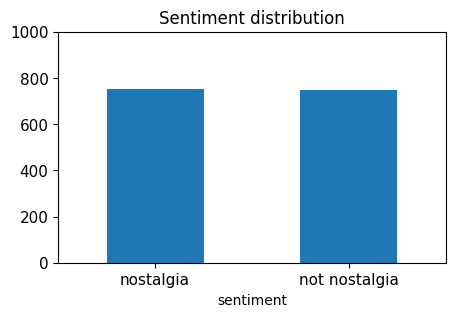

In [11]:
print(X['sentiment'].value_counts())

# plot barchart for X
X['sentiment'].value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, 1000],        
                                    rot = 0, fontsize = 11, figsize = (5,3))

In [12]:
import nltk

In [13]:
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

X['unigrams'] = X['comment'].apply(lambda text: tokenize_text(text))
X

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

                                               unigrams  
0     [He, was, a, singer, with, a, golden, voice, t...  
1     [The, mist, beautiful, voice, ever, I, listene...  
2     [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3     [30, day, leave, from, 1st, tour, in, Viet, Na...  
4     [listening, to, his, songs, reminds, me, of, m...  
...                                                 ...  
1495  [i, do, n't, know, !, .., but, the, opening, o...  
1496  [it, 's, sad, this, is, such, a, beautiful, so...  
1497  [Dear, Friend, ,, I, think, age, and, time, is...  
1498  [I, was, born, in, 1954, and, started, to, be,...  
1499  [This, is, the, first, CD, I, bought, after, m...  

[1499 rows x 3 columns]

In [14]:
list(X.loc[1497]['unigrams'])

['Dear',
 'Friend',
 ',',
 'I',
 'think',
 'age',
 'and',
 'time',
 'is',
 'not',
 'that',
 'important',
 'when',
 'it',
 'comes',
 'to',
 'music',
 '.',
 'I',
 'am',
 'glad',
 'you',
 'like',
 'this',
 'song',
 '.']

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X['comment']) #learn the vocabulary and return document-term matrix
X_counts.shape

(1499, 3730)

In [16]:
row = 0
print(X_counts[row])
X.loc[row, 'unigrams']

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 45 stored elements and shape (1, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


['He',
 'was',
 'a',
 'singer',
 'with',
 'a',
 'golden',
 'voice',
 'that',
 'I',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 '.',
 'I',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 '.',
 'Although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 ',',
 'but',
 ',',
 'I',
 'can',
 'vouch',
 'for',
 'Jim',
 'Reeves',
 'all',
 'the',
 'time',
 '.',
 'You',
 'feel',
 'relaxed',
 ',',
 'emotional',
 'and',
 'loving',
 '.',
 'Thank',
 'you',
 'Lord',
 'for',
 'his',
 'life',
 '.']

In [17]:
count_vect.get_feature_names_out()[3284]

'the'

In [18]:
vocab = count_vect.vocabulary_
index = vocab.get('the')
print(index)

3284


In [19]:
import numpy as np
word_counts = np.asarray(X_counts.sum(axis=0)).flatten()
print(word_counts.size)

3730


In [20]:
word_count_dict = dict(zip(count_vect.get_feature_names_out(), word_counts))
# for word, count in word_count_dict.items():
    # print(f"'{word}': {count}")

In [21]:
print("most usage word: ")
print(count_vect.get_feature_names_out()[np.argmax(word_counts)])
print("most usage times: ")
print(np.max(word_counts))

most usage word: 
the
most usage times: 
1351


In [22]:
word_count_dict.get('the') #sum of word: the

np.int64(1351)

In [23]:
import plotly.express as px
import pandas as pd
import math

word_counts_log = [math.log(i) for i in word_counts]

terms = count_vect.get_feature_names_out()
temp_df = pd.DataFrame({
    'term': terms,
    'frequency': word_counts_log
})

filtered_df = temp_df[temp_df['frequency'] > 2]
sorted_df = filtered_df.sort_values(by='frequency', ascending=False)

fig = px.histogram(sorted_df, x='term', y='frequency')

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),  # Adds the range slider
        tickmode='linear',               # Ensures all ticks are spaced evenly
    )
)

fig.show()

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
labels = X['sentiment'].unique()  # Get unique category labels 四種不同的 category
labels_dfs = {}  # Dictionary to store DataFrames for each category

for label in labels:
    # Filter the original DataFrame by category
    labels_dfs[label] = X[X['sentiment'] == label].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for label in labels:
    term_document_dfs[label] = create_term_document_df(labels_dfs[label])

In [25]:
X_counts

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 31249 stored elements and shape (1499, 3730)>

In [26]:
label_index = 1 # 0, 1
print(f"Filtered Term-Document Frequency DataFrame for Label {labels[label_index]}:")
term_document_dfs[labels[label_index]]
# 某個 category 中每個 doc 中，各個單字的數量
# doc數量 * 這個category中所有用到的單字種類的數量

Filtered Term-Document Frequency DataFrame for Label nostalgia:


07  10  11  11th  12  13  14  15  16  17  ...  young  younger  youngster  \
0     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
1     0   0   0     0   0   0   0   0   0   1  ...      0        0          0   
2     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
3     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
4     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...    ...      ...        ...   
745   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
746   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
747   0   0   0     0   0   1   0   0   0   0  ...      0        0          0   
748   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
749   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   

     your  yours  youth  youthful  youtube  yrs  yup  
0       0      0      0         0        0    0    0  
1       0      0      0         0        0    0    0  
2       0      0      0         0        0    0    0  
3       1      0      0         0        0    0    0  
4       0      0      0         0        0    0    0  
..    ...    ...    ...       ...      ...  ...  ...  
745     0      0      0         0        0    0    1  
746     0      0      0         0        0    0    0  
747     0      0      0         0        0    0    0  
748     0      0      0         0        0    0    0  
749     0      0      0         0        0    0    0  

[750 rows x 2295 columns]

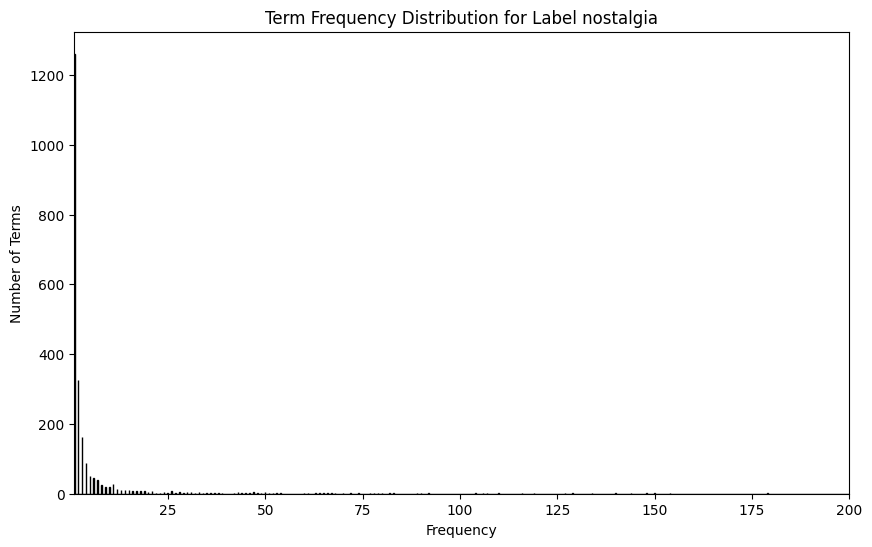

In [27]:
category_number=0 #You can change it from 0 to 3
word_counts = term_document_dfs[labels[label_index]].sum(axis=0).to_numpy()
# 這個 category 下 所有 docs 中各個 word出現的次數加總

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
# 每個 bin 中有很多個單字
plt.title(f'Term Frequency Distribution for Label {labels[label_index]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms') # 這個 bin 中含有幾個 word
plt.xlim(1, 200) # 使用次數最少的前 1~200 個 bin
plt.show()

# 將 word 根據使用頻率分成多個 bin

In [28]:
temp_pd_out_bottom = pd.DataFrame()
temp_pd_out_top = pd.DataFrame()

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, category_name, temp_pd_bottom, temp_pd_top, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    print(f'Bottom percentage: {sorted_words.head(bottom_n)}') # print which words correspond to the bottom percentage we filterd
    print(f'Top percentage: {sorted_words.tail(top_n)}') # print which words correspond to the top percentage we filterd

    if (temp_pd_top.empty):
        temp_pd_top = pd.DataFrame(sorted_words.tail(20).index.array, columns=[category_name])
    else:
        right = pd.DataFrame(sorted_words.tail(20).index.array, columns=[category_name])
        temp_pd_top = pd.merge(temp_pd_top, right, left_index=True, right_index=True)

    if (temp_pd_bottom.empty):
        temp_pd_bottom = pd.DataFrame(sorted_words.head(20).index.array, columns=[category_name])
    else:
        right = pd.DataFrame(sorted_words.head(20).index.array, columns=[category_name])
        temp_pd_bottom = pd.merge(temp_pd_bottom, right, left_index=True, right_index=True)
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove), temp_pd_bottom, temp_pd_top
    

# Apply the filtering function to each category
filtered_term_document_dfs = {}

for label in labels:
    print(f'For label {label} we filter the following words:')
    filtered_term_document_dfs[label], temp_pd_out_bottom, temp_pd_out_top = filter_top_bottom_words_by_sum(term_document_dfs[label], label, temp_pd_out_bottom, temp_pd_out_top)

# Example: Display the filtered DataFrame for one of the categories
label_index = 0 # 0, 1
print(f"Filtered Term-Document Frequency DataFrame for Label {labels[label_index]}:")
filtered_term_document_dfs[labels[label_index]]

For label not nostalgia we filter the following words:
Bottom percentage: 12           1
16years      1
zealand      1
sensitive    1
sense        1
xd           1
wwii         1
wuv          1
writers      1
writer       1
wrenching    1
wouldn       1
1998         1
measure      1
spine        1
spewing      1
2040         1
2018         1
2017         1
2010         1
1957         1
1955         1
1952         1
1930s        1
1930         1
17th         1
dtype: int64
Top percentage: first       23
got         23
amazing     23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64
For label nostalgia we filter the following words:
Bottom percentage: yo         1
yet        1
yester     1
yeas       1
yearn      1
yeah       1
1952       1
1950       1
1969       1
1964       1
lp         1
safety     1
safer      1
saddest    1
seeing     1
lou        1
proud      1
protest    1
2002       1

00  000  045  10  100  10m  11  14  15  150  ...  young  younger  \
0     0    0    0   0    0    0   0   0   0    0  ...      0        0   
1     0    0    0   0    0    0   0   0   0    0  ...      0        0   
2     0    0    0   0    0    0   0   0   0    0  ...      0        0   
3     0    0    0   0    0    0   0   0   0    0  ...      0        0   
4     0    0    0   0    0    0   0   0   0    0  ...      0        0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ...  ...    ...      ...   
744   0    0    0   0    0    0   0   0   0    0  ...      0        0   
745   0    0    0   0    0    0   0   0   0    0  ...      0        0   
746   0    0    0   0    0    0   0   0   0    0  ...      0        0   
747   0    0    0   0    0    0   0   0   0    0  ...      0        0   
748   0    0    0   0    0    0   0   0   0    0  ...      0        0   

     youngest  youngsters  yourself  youth  youtube  yrs  yuo  zulus  
0           0           0         0      0        0    0    0      0  
1           0           0         0      0        0    0    0      0  
2           0           0         0      0        0    0    0      0  
3           0           0         0      0        0    0    0      0  
4           0           0         0      0        0    0    0      0  
..        ...         ...       ...    ...      ...  ...  ...    ...  
744         0           0         0      0        0    0    0      0  
745         0           0         0      0        0    0    0      0  
746         0           0         0      0        0    0    0      0  
747         0           0         0      0        0    0    0      0  
748         0           0         0      0        0    0    0      0  

[749 rows x 2446 columns]

In [29]:
temp_pd_out_bottom

not nostalgia nostalgia
0             12        yo
1        16years       yet
2        zealand    yester
3      sensitive      yeas
4          sense     yearn
5             xd      yeah
6           wwii      1952
7            wuv      1950
8        writers      1969
9         writer      1964
10     wrenching        lp
11        wouldn    safety
12          1998     safer
13       measure   saddest
14         spine    seeing
15       spewing       lou
16          2040     proud
17          2018   protest
18          2017      2002
19          2010       yup

In [30]:
temp_pd_out_top.iloc[::-1].reset_index(drop=True)

not nostalgia nostalgia
0            the       the
1           this        my
2            and      this
3             to        to
4             of       and
5           song      song
6             it       was
7             is        of
8             in        in
9            you        it
10          that        me
11            my      back
12          love  memories
13         music      when
14           was        so
15           for     years
16            so      that
17          have        on
18           one      love
19          like       for

In [31]:
term_document_dfs = filtered_term_document_dfs

In [32]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for label in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    label_safe = label.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[label])
    obj.convert2TransactionalDatabase(f'td_freq_db_{label_safe}.csv', '>=', 1)
    #使用頻率大於等於1的(有使用的)都會被加入 transaction 中

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.696185286103542
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.20498326251217
Variance in Transaction Sizes : 51.982604800547186
Sparsity : 0.9959721235358483


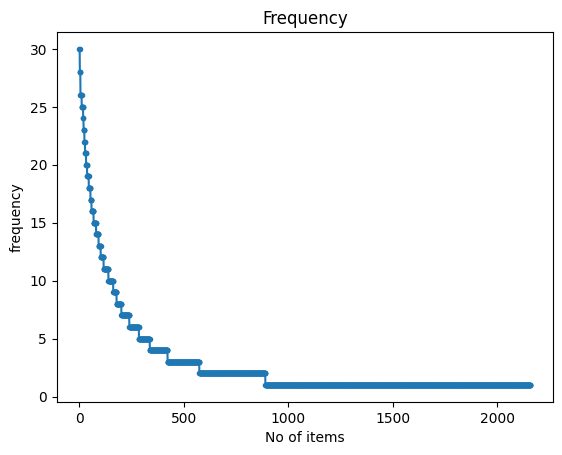

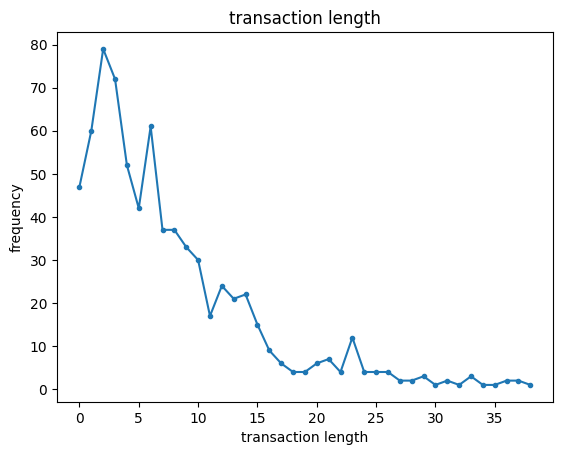

In [33]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 746
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.399463806970509
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.940834266064001
Variance in Transaction Sizes : 35.3408856181514
Sparsity : 0.9965660409619908


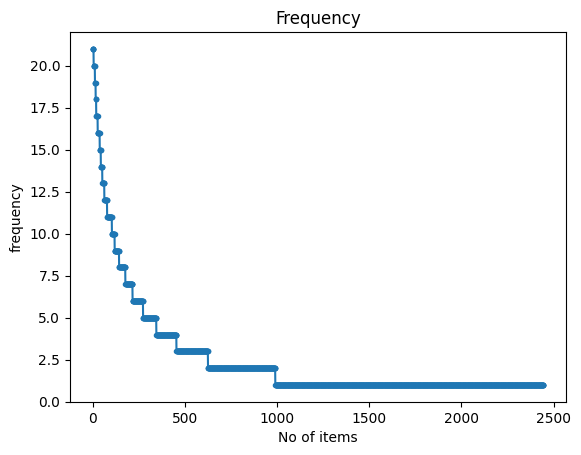

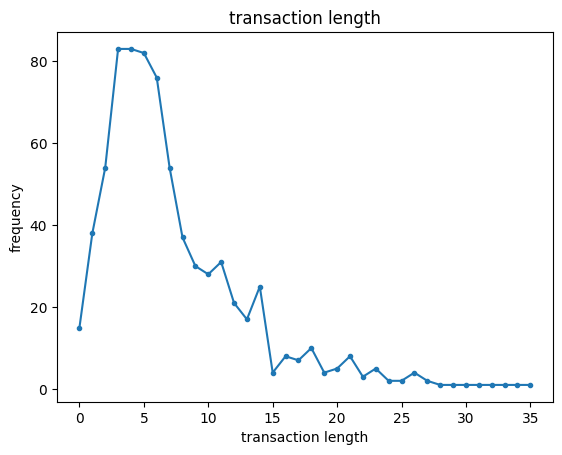

In [34]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [35]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSups =[6, 9, 12]
labels = ["nostalgia", "not nostalgia"]
FPGrowth_dfs = list(dict())

for label in labels:
    d = {}
    for minSup in minSups:
        f'td_freq_db_{label_safe}.csv'
        obj = alg.FPGrowth(iFile=f'td_freq_db_{label}.csv', minSup=minSup)
        obj.mine()
        frequentPatternsDF= obj.getPatternsAsDataFrame()
        d[minSup] = frequentPatternsDF
        print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
        print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
        obj.save(f'freq_patterns_{label}_minSup{minSup}.txt') #save the patterns
    FPGrowth_dfs.append(d)

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 300
Runtime: 0.008742332458496094
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.006528377532958984
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 118
Runtime: 0.005382061004638672
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 277
Runtime: 0.008651256561279297
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.004511356353759766
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 79
Runtime: 0.34499192237854004


In [36]:
# FAE Top-K, ref: https://pami-1.readthedocs.io/en/latest/frequentPatternTopkFAE.html
from PAMI.frequentPattern.topk import FAE as alg

ks = [100, 200, 300]
labels = ["nostalgia", "not nostalgia"]
FAE_TopK_dfs = list(dict())

for label in labels:
    d = {}
    for k in ks:
        obj = alg.FAE(iFile=f'td_freq_db_{label}.csv', k=k)
        obj.mine()
        frequentPatternsDF= obj.getPatternsAsDataFrame()
        d[k] = frequentPatternsDF
        print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
        print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
        obj.save(f'freq_patterns_{label}_k{k}.txt') #save the patterns
    FAE_TopK_dfs.append(d)

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 100
Runtime: 0.008549213409423828
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 200
Runtime: 0.010138988494873047
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 300
Runtime: 0.016095638275146484
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 100
Runtime: 0.00552058219909668
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 200
Runtime: 0.009523868560791016
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 300
Runtime: 0.015552759170532227


In [37]:
# MaxFPGrowth, ref: https://pami-1.readthedocs.io/en/latest/frequentPatternMaximalmaxFPGrowth.html
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

max_minSups =[6, 9, 12]
labels = ["nostalgia", "not nostalgia"]
MaxFPGrowth_dfs = list(dict())

for label in labels:
    d = {}
    for minSup in max_minSups:
        obj = alg.MaxFPGrowth(iFile=f'td_freq_db_{label}.csv', minSup=minSup)
        obj.mine()
        frequentPatternsDF= obj.getPatternsAsDataFrame()
        d[minSup] = frequentPatternsDF
        print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
        print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
        obj.save(f'freq_patterns_{label}_Max_minSup{minSup}.txt') #save the patterns
    MaxFPGrowth_dfs.append(d)

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 275
Runtime: 0.009111404418945312
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 176
Runtime: 0.0075206756591796875
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 114
Runtime: 0.006214618682861328
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 271
Runtime: 0.007522106170654297
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 144
Runtime: 0.006272792816162109
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 79
Runtime: 0.003991603851318359


In [67]:
# Identify patterns that appear in more than one label (FPGrowth)

# Count how many times each pattern appears across all dataframes
pattern_counts = {}
dfs = FPGrowth_dfs
key = 9 # minSup

for parameter_dict in dfs:
    df = parameter_dict.get(key)
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all labels
total_patterns_count = sum(len(parameter_dict.get(key)) for parameter_dict in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for parameter_dict in dfs:
    df = parameter_dict.get(key)
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df_FPGrowth = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df_FPGrowth = final_pattern_df_FPGrowth.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df_FPGrowth)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
127    takes       30
125     ever       28
126    would       28
123       or       26
120      kid       26
..       ...      ...
135   others        9
136     pure        9
137   please        9
138   though        9
139   wonder        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [68]:
# Identify patterns that appear in more than one label (FPGrowth)

# Count how many times each pattern appears across all dataframes
pattern_counts = {}
dfs = MaxFPGrowth_dfs
key = 9 # max_minSup

for parameter_dict in dfs:
    df = parameter_dict.get(key)
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all labels
total_patterns_count = sum(len(parameter_dict.get(key)) for parameter_dict in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for parameter_dict in dfs:
    df = parameter_dict.get(key)
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df_MaxFPGrowth = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df_MaxFPGrowth = final_pattern_df_MaxFPGrowth.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df_MaxFPGrowth)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
123   takes        30
121   would        28
122    ever        28
117      or        26
118    such        26
..       ...      ...
131  person         9
132  wonder         9
133  though         9
134  please         9
135    pure         9

[216 rows x 2 columns]
Number of patterns discarded: 104


In [69]:
# Identify patterns that appear in more than one label (FPGrowth)

# Count how many times each pattern appears across all dataframes
pattern_counts = {}
dfs = FAE_TopK_dfs
key = 200 # k

for parameter_dict in dfs:
    df = parameter_dict.get(key)
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all labels
total_patterns_count = sum(len(parameter_dict.get(key)) for parameter_dict in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for parameter_dict in dfs:
    df = parameter_dict.get(key)
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df_FAE_TopK = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df_FAE_TopK = final_pattern_df_FAE_TopK.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df_FAE_TopK)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

        Patterns  Support
0          takes       30
1           ever       28
2          would       28
3            kid       26
4           only       26
..           ...      ...
247         miss        7
248        lived        7
249         hard        7
250  masterpiece        7
251       talent        7

[252 rows x 2 columns]
Number of patterns discarded: 148


In [97]:
final_pattern_df = final_pattern_df_MaxFPGrowth

In [98]:
X

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

                                               unigrams  \
0     [He, was, a, singer, with, a, golden, voice, t...   
1     [The, mist, beautiful, voice, ever, I, listene...   
2     [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3     [30, day, leave, from, 1st, tour, in, Viet, Na...   
4     [listening, to, his, songs, reminds, me, of, m...   
...                                                 ...   
1495  [i, do, n't, know, !, .., but, the, opening, o...   
1496  [it, 's, sad, this, is, such, a, beautiful, so...   
1497  [Dear, Friend, ,, I, think, age, and, time, is...   
1498  [I, was, born, in, 1954, and, started, to, be,...   
1499  [This, is, the, first, CD, I, bought, after, m...   

                                         tokenized_text bin_sentiment  \
0     {have, with, I, Although, at, relaxed,, and, t...           [1]   
1     {I, listened, and, to, an, angel, love, kid, N...           [0]   
2     {have, I, leave, with, think, most, smooth, at...           [0]   
3     {leave, I, came, God, have, served, back, bles...           [1]   
4     {me, mum, everyday, listening, songs, my, to, ...           [0]   
...                                                 ...           ...   
1495  {painter, well!...or, video,..seeing, thing, S...           [1]   
1496  {feel.., and, to, such, love, really, it's, yo...           [1]   
1497  {I, think, not, important, and, to, it, comes,...           [1]   
1498  {have, I, started, has, captured, imagination....           [0]   
1499  {I, ended, 21, loud, driving, years., marriage...           [0]   

      sentiment_num  
0                 1  
1                 0  
2                 0  
3                 1  
4                 0  
...             ...  
1495              1  
1496              1  
1497              1  
1498              0  
1499              0  

[1499 rows x 6 columns]

In [99]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'comment' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # df['comment'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  special   favorites   \
0      0    0    0   0   0    0    0   0     0   0  ...         0           0   
1      0    0    0   0   0    0    0   0     0   0  ...         0           0   
2      0    0    0   0   0    0    0   0     0   0  ...         0           0   
3      0    0    0   0   0    0    0   0     0   0  ...         0           0   
4      0    0    0   0   0    0    0   0     0   0  ...         0           0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...       ...         ...   
1495   0    0    0   0   0    0    0   0     0   0  ...         0           0   
1496   0    0    0   0   0    0    0   0     0   0  ...         0           0   
1497   0    0    0   0   0    0    0   0     0   0  ...         0           0   
1498   0    0    0   0   0    0    0   0     0   0  ...         0           0   
1499   0    0    0   0   0    0    0   0     0   0  ...         0           0   

      perfect   handsome   sung   person   wonder   though   please   pure   
0            0          0      0        0        0        0        0      0  
1            0          0      0        0        0        0        0      0  
2            0          0      0        0        0        0        0      0  
3            0          0      0        0        0        0        0      0  
4            0          0      0        0        0        0        0      0  
...        ...        ...    ...      ...      ...      ...      ...    ...  
1495         0          0      0        0        0        0        0      0  
1496         0          0      0        0        0        0        0      0  
1497         0          0      0        0        0        0        0      0  
1498         0          0      0        0        0        0        0      0  
1499         0          0      0        0        0        0        0      0  

[1499 rows x 3946 columns]

In [100]:
X # what the diff between unigrams and tokennized_text

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

                                               unigrams  \
0     [He, was, a, singer, with, a, golden, voice, t...   
1     [The, mist, beautiful, voice, ever, I, listene...   
2     [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3     [30, day, leave, from, 1st, tour, in, Viet, Na...   
4     [listening, to, his, songs, reminds, me, of, m...   
...                                                 ...   
1495  [i, do, n't, know, !, .., but, the, opening, o...   
1496  [it, 's, sad, this, is, such, a, beautiful, so...   
1497  [Dear, Friend, ,, I, think, age, and, time, is...   
1498  [I, was, born, in, 1954, and, started, to, be,...   
1499  [This, is, the, first, CD, I, bought, after, m...   

                                         tokenized_text bin_sentiment  \
0     {have, with, I, Although, at, relaxed,, and, t...           [1]   
1     {I, listened, and, to, an, angel, love, kid, N...           [0]   
2     {have, I, leave, with, think, most, smooth, at...           [0]   
3     {leave, I, came, God, have, served, back, bles...           [1]   
4     {me, mum, everyday, listening, songs, my, to, ...           [0]   
...                                                 ...           ...   
1495  {painter, well!...or, video,..seeing, thing, S...           [1]   
1496  {feel.., and, to, such, love, really, it's, yo...           [1]   
1497  {I, think, not, important, and, to, it, comes,...           [1]   
1498  {have, I, started, has, captured, imagination....           [0]   
1499  {I, ended, 21, loud, driving, years., marriage...           [0]   

      sentiment_num  
0                 1  
1                 0  
2                 0  
3                 1  
4                 0  
...             ...  
1495              1  
1496              1  
1497              1  
1498              0  
1499              0  

[1499 rows x 6 columns]

In [101]:
len(X.loc[0, 'unigrams'])

68

In [102]:
len(X.loc[0, 'tokenized_text'])

49

In [103]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
# 先嘗試應用在沒有經過增強的資料上(沒有 pattern)
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

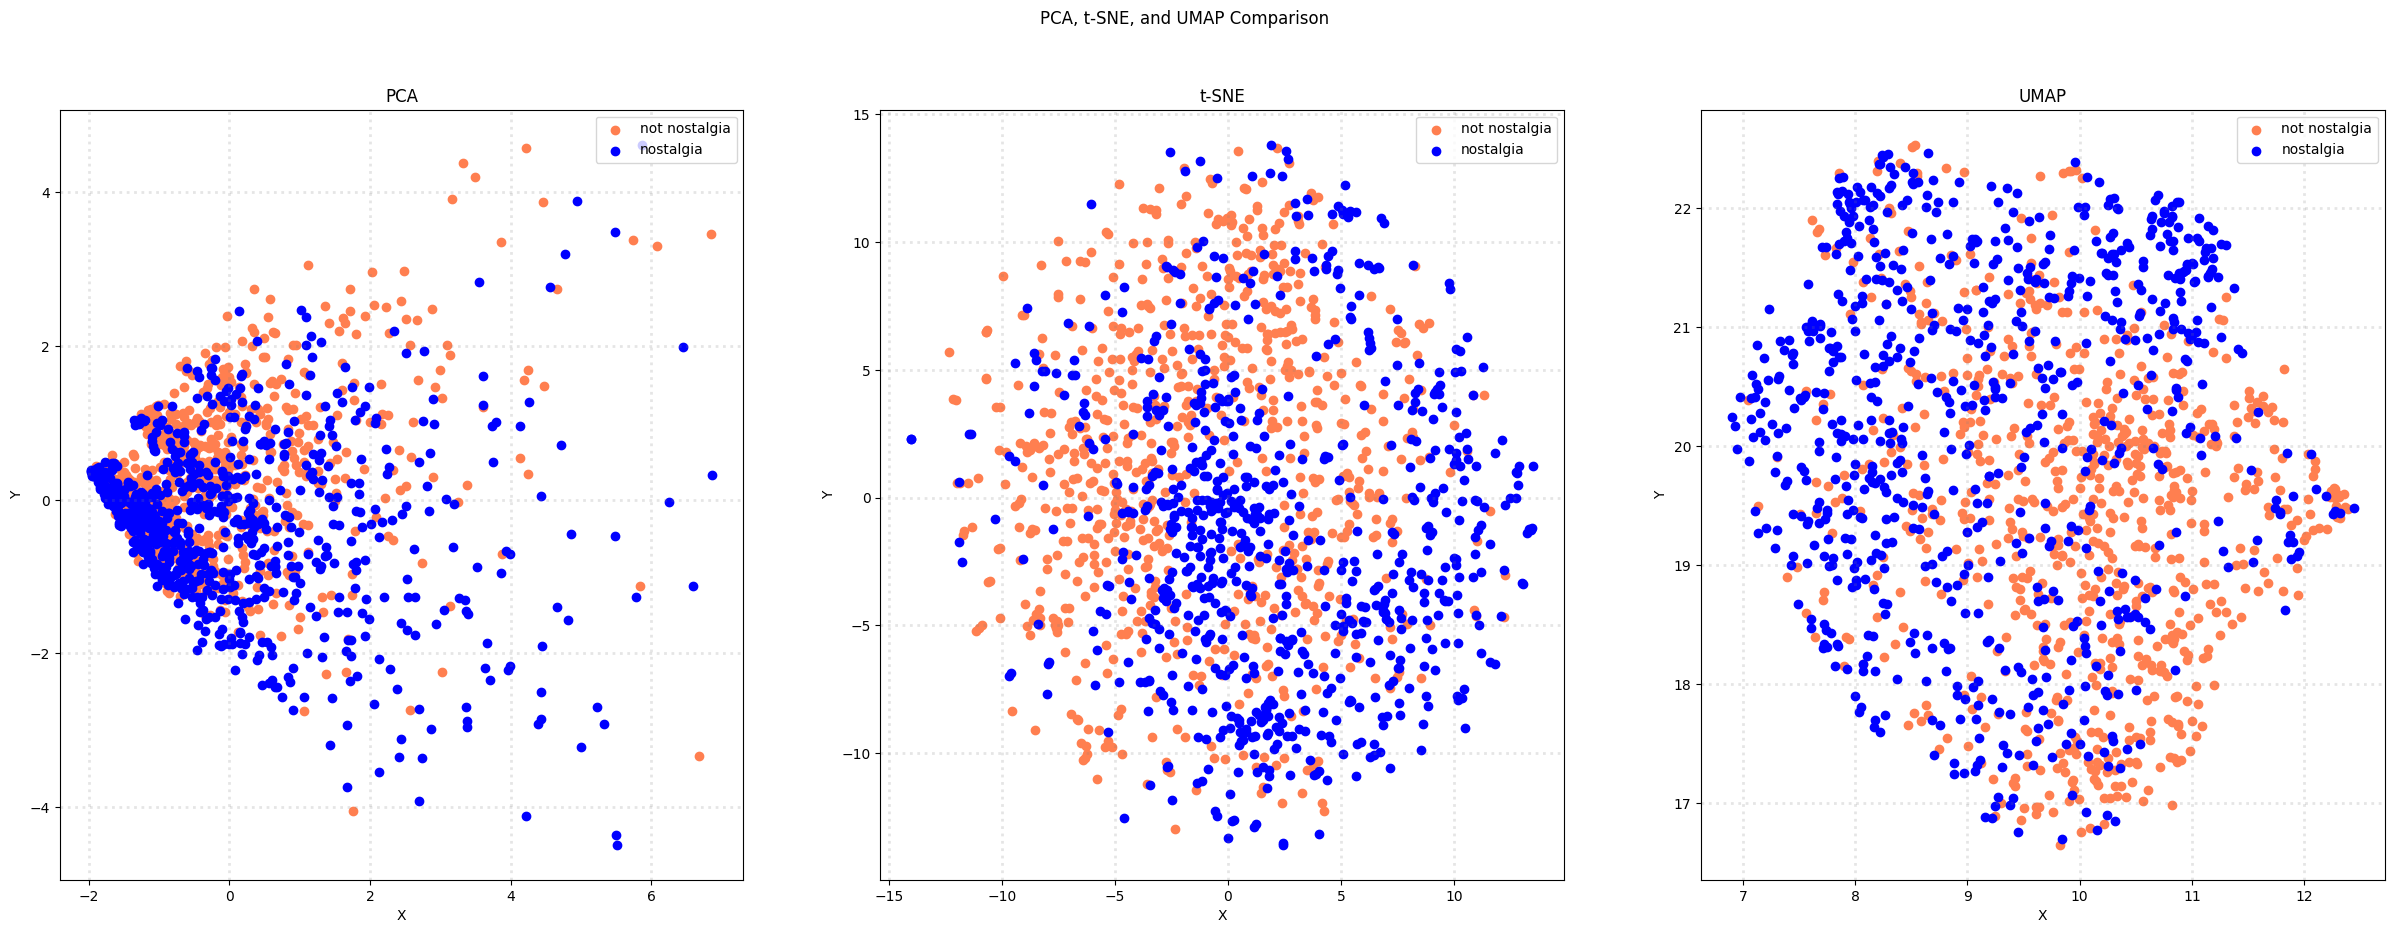

In [104]:
# Plot the results in subplots
col = ['coral', 'blue']
sentiments = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, lable in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == lable].T[0]
        ys = X_reduced[X['sentiment'] == lable].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=lable)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [105]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

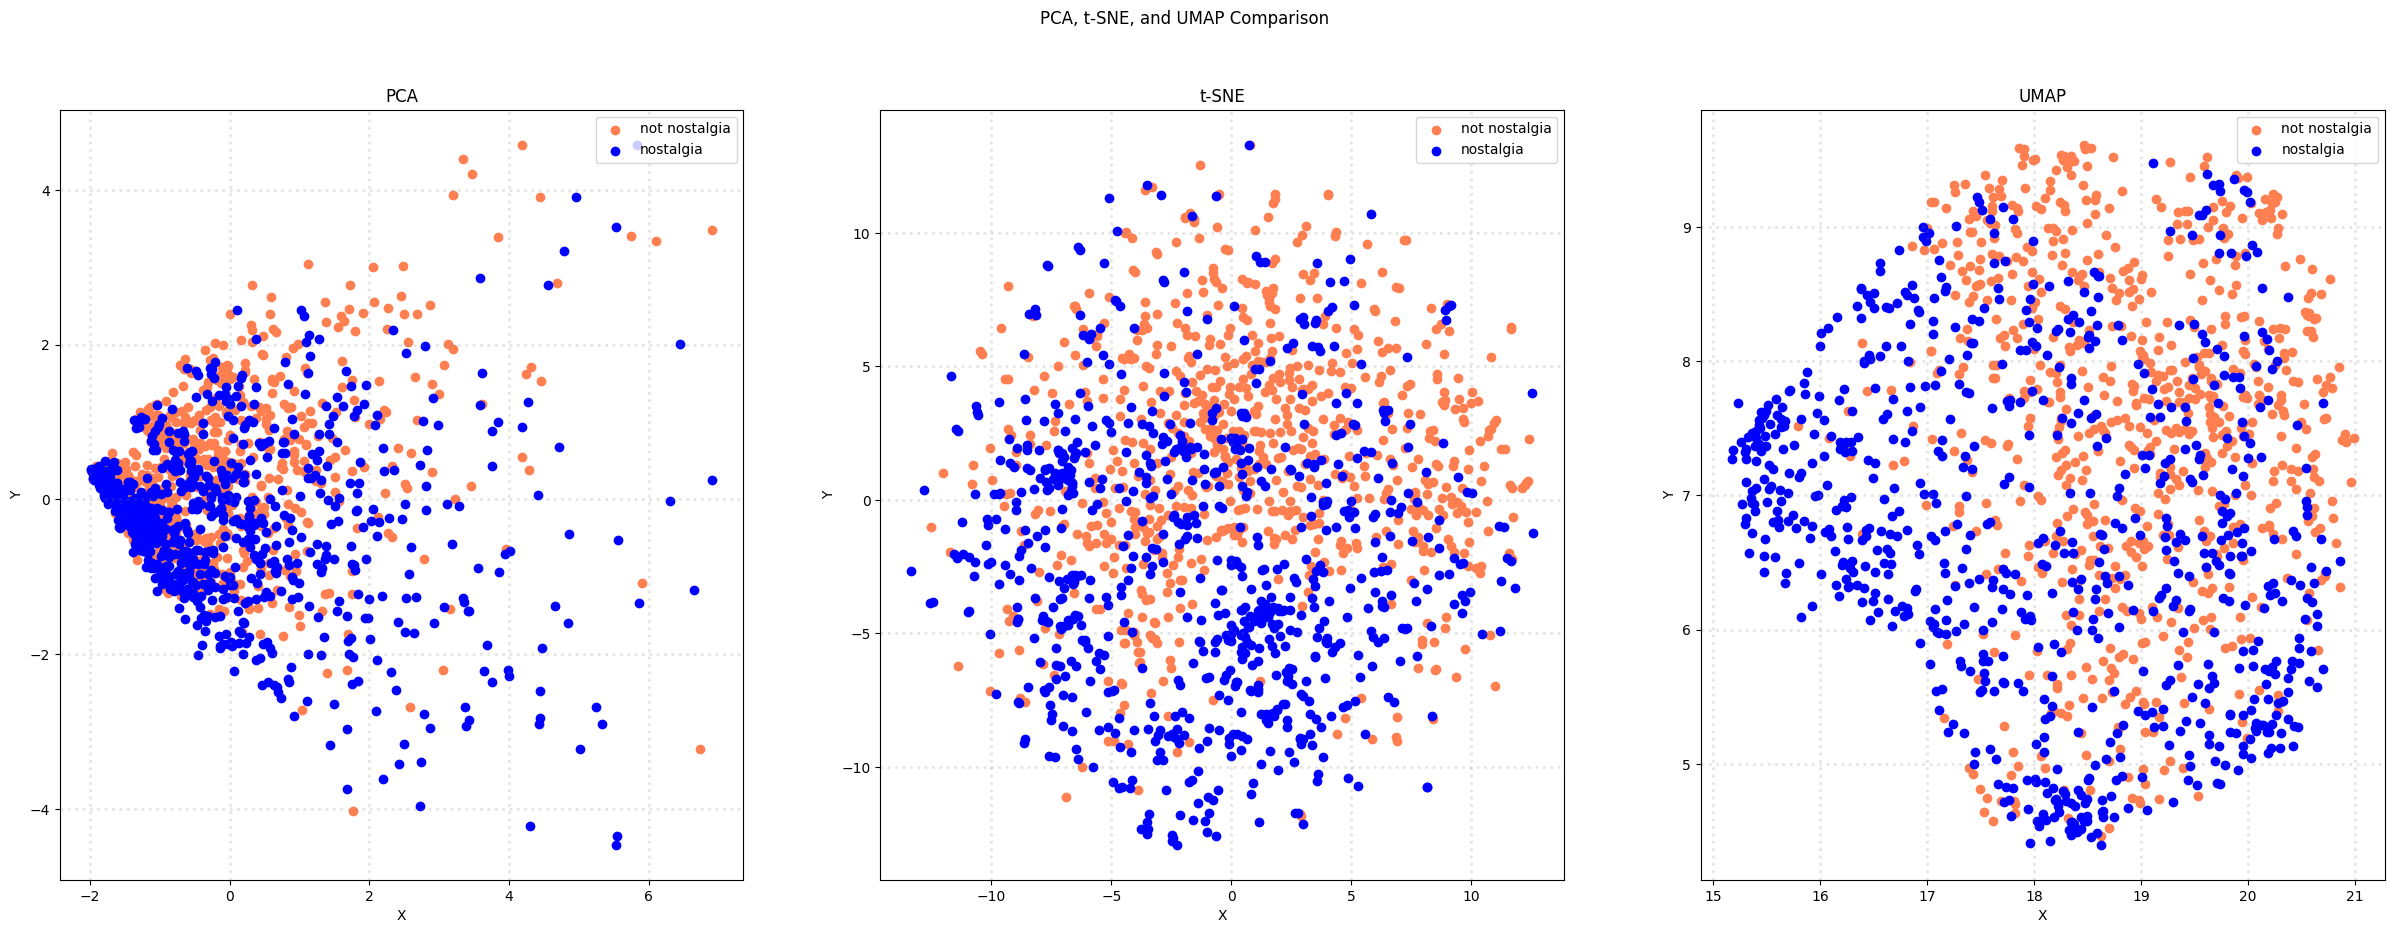

In [106]:
# Plot the results in subplots
col = ['coral', 'blue']
sentiments = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, lable in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == lable].T[0]
        ys = X_reduced[X['sentiment'] == lable].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=lable)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

In [107]:
# Answer here
X_pca_aug_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

In [108]:
def cal_df (X_reduced):
    df = pd.DataFrame()
    for c, label in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == label].T[0]
        ys = X_reduced[X['sentiment'] == label].T[1]
        zs = X_reduced[X['sentiment'] == label].T[2]
        d = {'X': xs, 'Y': ys, 'Z': zs}
        temp_df = pd.DataFrame(data = d)
        temp_df['name'] = label
        if (df.empty):
            df = temp_df
        else:
            df = pd.concat([df, temp_df])
    return df

In [109]:
df_plot = cal_df(X_pca_aug_3d)
fig = px.scatter_3d(df_plot, x='X', y='Y', z='Z', color='name')
fig.show()

In [110]:
df_plot = cal_df(X_tsne_aug_3d)
fig = px.scatter_3d(df_plot, x='X', y='Y', z='Z', color='name')
fig.show()

In [111]:
df_plot = cal_df(X_umap_aug_3d)
fig = px.scatter_3d(df_plot, x='X', y='Y', z='Z', color='name')
fig.show()

In [112]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X['sentiment'])
X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()
X

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

                                               unigrams  \
0     [He, was, a, singer, with, a, golden, voice, t...   
1     [The, mist, beautiful, voice, ever, I, listene...   
2     [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3     [30, day, leave, from, 1st, tour, in, Viet, Na...   
4     [listening, to, his, songs, reminds, me, of, m...   
...                                                 ...   
1495  [i, do, n't, know, !, .., but, the, opening, o...   
1496  [it, 's, sad, this, is, such, a, beautiful, so...   
1497  [Dear, Friend, ,, I, think, age, and, time, is...   
1498  [I, was, born, in, 1954, and, started, to, be,...   
1499  [This, is, the, first, CD, I, bought, after, m...   

                                         tokenized_text bin_sentiment  \
0     {have, with, I, Although, at, relaxed,, and, t...           [1]   
1     {I, listened, and, to, an, angel, love, kid, N...           [0]   
2     {have, I, leave, with, think, most, smooth, at...           [0]   
3     {leave, I, came, God, have, served, back, bles...           [1]   
4     {me, mum, everyday, listening, songs, my, to, ...           [0]   
...                                                 ...           ...   
1495  {painter, well!...or, video,..seeing, thing, S...           [1]   
1496  {feel.., and, to, such, love, really, it's, yo...           [1]   
1497  {I, think, not, important, and, to, it, comes,...           [1]   
1498  {have, I, started, has, captured, imagination....           [0]   
1499  {I, ended, 21, loud, driving, years., marriage...           [0]   

      sentiment_num  
0                 1  
1                 0  
2                 0  
3                 1  
4                 0  
...             ...  
1495              1  
1496              1  
1497              1  
1498              0  
1499              0  

[1499 rows x 6 columns]

In [113]:
X_sample = X.sample(n=3)
X_sample

document_to_transform_1 = []
random_record_1 = X_sample.iloc[0, 1]
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X_sample.iloc[1, 1]
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X_sample.iloc[2, 1]
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['This song brings back a lot memories. Some good and some bad. But I still love this beautiful song.']
["Forgive me, I have never heard this song before today. Came on the radio and I instantly loved it. Can't believe I missed it all these years."]
['This is true romantic music!! What a difference with the  "Noisy Tunes"  we keep hearing !!']


In [114]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [115]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

Cosine Similarity using count bw 1 and 2: 0.204465
Cosine Similarity using count bw 1 and 3: 0.111456
Cosine Similarity using count bw 2 and 3: 0.104828


C:\Users\USER\AppData\Local\Temp\ipykernel_5008\2841806267.py:9: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_5008\2841806267.py:10: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_5008\2841806267.py:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [116]:
X

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

                                               unigrams  \
0     [He, was, a, singer, with, a, golden, voice, t...   
1     [The, mist, beautiful, voice, ever, I, listene...   
2     [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3     [30, day, leave, from, 1st, tour, in, Viet, Na...   
4     [listening, to, his, songs, reminds, me, of, m...   
...                                                 ...   
1495  [i, do, n't, know, !, .., but, the, opening, o...   
1496  [it, 's, sad, this, is, such, a, beautiful, so...   
1497  [Dear, Friend, ,, I, think, age, and, time, is...   
1498  [I, was, born, in, 1954, and, started, to, be,...   
1499  [This, is, the, first, CD, I, bought, after, m...   

                                         tokenized_text bin_sentiment  \
0     {have, with, I, Although, at, relaxed,, and, t...           [1]   
1     {I, listened, and, to, an, angel, love, kid, N...           [0]   
2     {have, I, leave, with, think, most, smooth, at...           [0]   
3     {leave, I, came, God, have, served, back, bles...           [1]   
4     {me, mum, everyday, listening, songs, my, to, ...           [0]   
...                                                 ...           ...   
1495  {painter, well!...or, video,..seeing, thing, S...           [1]   
1496  {feel.., and, to, such, love, really, it's, yo...           [1]   
1497  {I, think, not, important, and, to, it, comes,...           [1]   
1498  {have, I, started, has, captured, imagination....           [0]   
1499  {I, ended, 21, loud, driving, years., marriage...           [0]   

      sentiment_num  
0                 1  
1                 0  
2                 0  
3                 1  
4                 0  
...             ...  
1495              1  
1496              1  
1497              1  
1498              0  
1499              0  

[1499 rows x 6 columns]

In [117]:
X['sentiment_num'] = X['bin_sentiment'].apply(lambda x: x[0])
X

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

                                               unigrams  \
0     [He, was, a, singer, with, a, golden, voice, t...   
1     [The, mist, beautiful, voice, ever, I, listene...   
2     [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3     [30, day, leave, from, 1st, tour, in, Viet, Na...   
4     [listening, to, his, songs, reminds, me, of, m...   
...                                                 ...   
1495  [i, do, n't, know, !, .., but, the, opening, o...   
1496  [it, 's, sad, this, is, such, a, beautiful, so...   
1497  [Dear, Friend, ,, I, think, age, and, time, is...   
1498  [I, was, born, in, 1954, and, started, to, be,...   
1499  [This, is, the, first, CD, I, bought, after, m...   

                                         tokenized_text bin_sentiment  \
0     {have, with, I, Although, at, relaxed,, and, t...           [1]   
1     {I, listened, and, to, an, angel, love, kid, N...           [0]   
2     {have, I, leave, with, think, most, smooth, at...           [0]   
3     {leave, I, came, God, have, served, back, bles...           [1]   
4     {me, mum, everyday, listening, songs, my, to, ...           [0]   
...                                                 ...           ...   
1495  {painter, well!...or, video,..seeing, thing, S...           [1]   
1496  {feel.., and, to, such, love, really, it's, yo...           [1]   
1497  {I, think, not, important, and, to, it, comes,...           [1]   
1498  {have, I, started, has, captured, imagination....           [0]   
1499  {I, ended, 21, loud, driving, years., marriage...           [0]   

      sentiment_num  
0                 1  
1                 0  
2                 0  
3                 1  
4                 0  
...             ...  
1495              1  
1496              1  
1497              1  
1498              0  
1499              0  

[1499 rows x 6 columns]

In [118]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
sentiment_mapping = dict(X[['sentiment_num', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]
print(target_names)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment_num'], test_size=0.3, random_state=42)

['nostalgia', 'not nostalgia']


In [119]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
486    0    0    0   0   0    0    0   0     0   0  ...      0         0   
528    0    0    0   0   0    0    0   0     0   0  ...      0         0   
200    0    0    0   0   0    0    0   0     0   0  ...      0         0   
890    0    0    0   0   0    0    0   0     0   0  ...      0         0   
845    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1131   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1295   0    0    0   0   0    0    0   0     0   0  ...      0         0   
861    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1460   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1127   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
486       0         0        0    0    0    0        0      0  
528       0         0        0    0    0    0        0      0  
200       0         0        0    0    0    0        0      0  
890       0         0        0    0    0    0        0      0  
845       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1131      0         0        0    0    0    0        0      0  
1295      0         0        0    0    0    0        0      0  
861       0         0        0    0    0    0        0      0  
1460      0         0        0    0    0    0        0      0  
1127      0         0        0    0    0    0        0      0  

[1049 rows x 3730 columns]

In [120]:
y_train

486     1
528     1
200     1
890     1
845     0
       ..
1131    0
1295    1
861     1
1460    1
1127    0
Name: sentiment_num, Length: 1049, dtype: int64

In [121]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8222    0.9528    0.8827       233
not nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



In [122]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
sentiment_mapping = dict(X[['sentiment_num', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]
print(target_names)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment_num'], test_size=0.3, random_state=42)

['nostalgia', 'not nostalgia']


In [123]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8622222222222222

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8155    0.9485    0.8770       233
not nostalgia     0.9330    0.7696    0.8434       217

     accuracy                         0.8622       450
    macro avg     0.8742    0.8590    0.8602       450
 weighted avg     0.8721    0.8622    0.8608       450

